In [1]:
import data_utils.data_analysis as data_analysis

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#READ THE DATASET
filename='datasets/galadriel_dataset_24_06_28.h5'
df_input,df_time_val,df_time,df_freq_val,df_freq_int = data_analysis.read_dataset(filename)

Input DF
       shot number  order2  order3     order4
0           136497   34900  -17000 -4600000.0
1           136498   34900  -17000 -4600000.0
2           136499   34900  -17000 -4600000.0
3           136500   34900  -17000 -4500000.0
4           136501   34900  -17000 -4500000.0
...            ...     ...     ...        ...
15503       152002   35400   29000 -3800000.0
15504       152003   35400   29000 -3800000.0
15505       152004   35400   29000 -3700000.0
15506       152005   35400   29000 -3700000.0
15507       152006   35400   29000 -3700000.0

[15508 rows x 4 columns]
----
Time values
0    -115.458450
1    -104.962227
2     -94.466005
3     -83.969782
4     -73.473559
5     -62.977336
6     -52.481114
7     -41.984891
8     -31.488668
9     -20.992445
10    -10.496223
11      0.000000
12     10.496223
13     20.992445
14     31.488668
15     41.984891
16     52.481114
17     62.977336
18     73.473559
19     83.969782
20     94.466005
21    104.962227
Name: 0, dtype: float6

In [3]:
df_input.describe()

,shot number,order2,order3,order4
count,15508.000000,15508.000000,15508.000000,1.550800e+04
mean,144251.653856,35149.974207,5996.131029,-4.116759e+06
std,4477.544794,158.118979,13565.163334,2.910849e+05
min,136497.000000,34900.000000,-17000.000000,-4.600000e+06
25%,140374.750000,35000.000000,-6000.000000,-4.400000e+06
50%,144251.500000,35150.000000,6000.000000,-4.100000e+06
75%,148129.250000,35300.000000,18000.000000,-3.900000e+06
max,152006.000000,35400.000000,29000.000000,-3.600000e+06


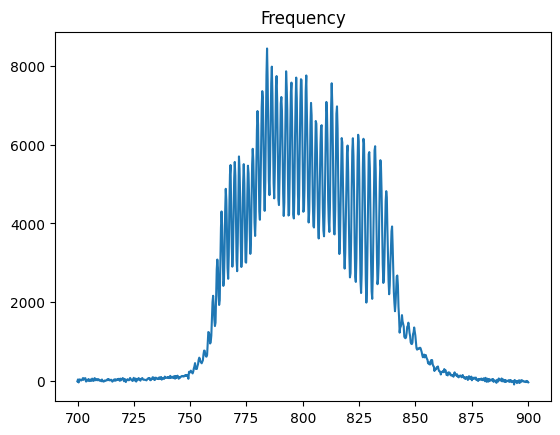

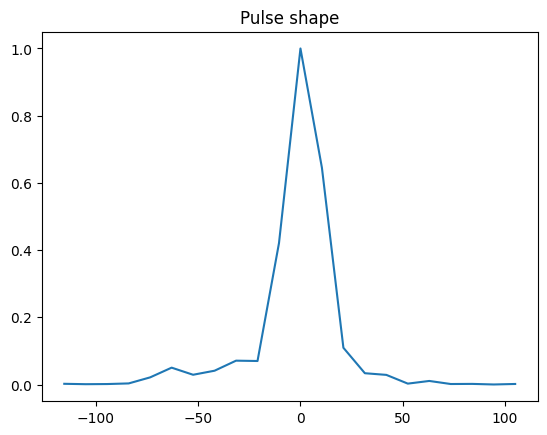

In [4]:
#plot a random shot
shot_index=2000
plt.plot(df_freq_val,df_freq_int.loc[shot_index])
#plt.plot(df_freq_val)
plt.title('Frequency')
plt.show()

plt.plot(df_time_val,df_time.loc[shot_index])
plt.title('Pulse shape')
plt.show()

In [5]:
maxval_freq=df_freq_int.max(axis=1)

Text(0, 0.5, 'Num. shots')

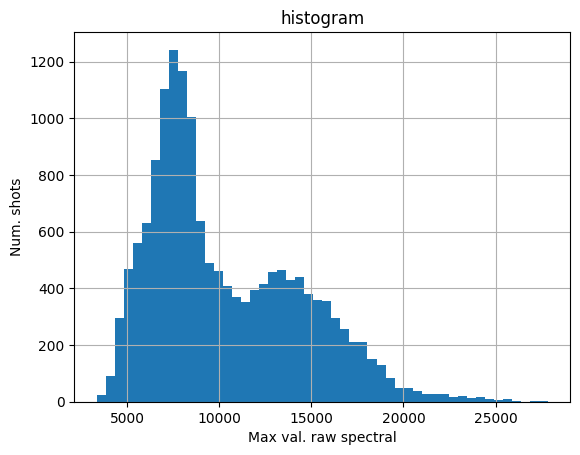

In [6]:
maxval_freq.hist(bins=50)
plt.title('histogram')
plt.xlabel('Max val. raw spectral')
plt.ylabel('Num. shots')

### Variance analysis

In [7]:
#Calculate the variance
dup_shots=2
df_time_var=data_analysis.get_var(df_input,df_time,dup_shots)
df_time_var_sum=df_time_var.sum(axis=1)

Text(0.5, 1.0, 'Histogram      (total num. shots=15508)')

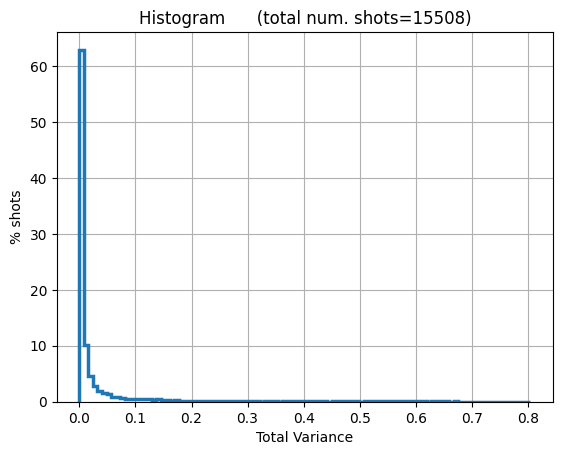

In [8]:
weights_time = 100*np.ones_like(df_time_var_sum) / len(df_time_var_sum)
df_time_var_sum.hist(bins=100,weights=weights_time,histtype="step",linewidth=2.5)
plt.ylabel('% shots')
plt.xlabel('Total Variance')
plt.title('Histogram      (total num. shots='+str(len(df_time_var_sum))+')')

## Compare with different datasets

In [9]:
filename='datasets/galadriel_dataset_24_03_14.h5'
df_input_240314,df_time_val_240314,df_time_240314,df_freq_val_240314,df_freq_int_240314 = data_analysis.read_dataset(filename)

#READ THE DATASET 24_04_11
filename='datasets/galadriel_dataset_24_04_11.h5'
df_input_240411,df_time_val_240411,df_time_240411,df_freq_val_240411,df_freq_int_240411 = data_analysis.read_dataset(filename)


#Get the clean shots
minval=8000
df_input_clean_240314,df_time_clean_240314,df_freq_int_clean_240314=data_analysis.clean_shots_below(minval,
    df_input_240314,df_time_240314,df_freq_int_240314)

value=65000
df_input_clean_240411,df_time_clean_240411,df_freq_int_clean_240411 = data_analysis.clean_shots_above(value,df_input_240411,df_time_240411,df_freq_int_240411)



dup_shots=2
#240314
df_time_clean_var_240314=data_analysis.get_var(df_input_clean_240314,df_time_clean_240314,dup_shots)
df_time_clean_var_sum_240314=df_time_clean_var_240314.sum(axis=1)

#240411
df_time_clean_var_240411=data_analysis.get_var(df_input_clean_240411,df_time_clean_240411,dup_shots)
df_time_clean_var_sum_240411=df_time_clean_var_240411.sum(axis=1)

Input DF
       shot number  order2  order3     order4
0             4731   34900  -17000 -3700000.0
1             4733   34900  -17000 -4600000.0
2             4734   34900  -17000 -4600000.0
3             4735   34900  -17000 -4600000.0
4             4736   34900  -17000 -4500000.0
...            ...     ...     ...        ...
12156        17147   35300   20000 -3800000.0
12157        17148   35300   20000 -3800000.0
12158        17149   35300   20000 -3800000.0
12159        17150   35300   20000 -3700000.0
12160        17151   35300   20000 -3700000.0

[12161 rows x 4 columns]
----
Time values
0    -94.466005
1    -83.969782
2    -73.473559
3    -62.977336
4    -52.481114
5    -41.984891
6    -31.488668
7    -20.992445
8    -10.496223
9      0.000000
10    10.496223
11    20.992445
12    31.488668
13    41.984891
14    52.481114
15    62.977336
16    73.473559
17    83.969782
18    94.466005
Name: 0, dtype: float64
----
Intensity
             0         1         2         3         

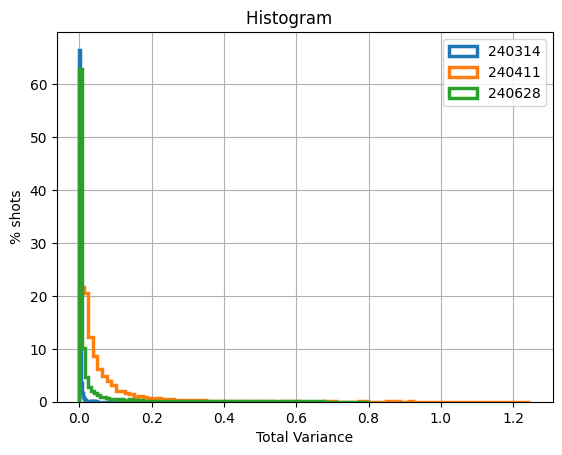

In [10]:
weights_time_240314 = 100*np.ones_like(df_time_clean_var_sum_240314) / len(df_time_clean_var_sum_240314)
weights_time_240411 = 100*np.ones_like(df_time_clean_var_sum_240411) / len(df_time_clean_var_sum_240411)
weights_time = 100*np.ones_like(df_time_var_sum) / len(df_time_var_sum)

df_time_clean_var_sum_240314.hist(bins=100,weights=weights_time_240314,histtype="step",linewidth=2.5,label='240314')
df_time_clean_var_sum_240411.hist(bins=100,weights=weights_time_240411,histtype="step",linewidth=2.5,label='240411')
df_time_var_sum.hist(bins=100,weights=weights_time,histtype="step",linewidth=2.5,label='240628')
#df_time_clean_var_sum_240606.hist(bins=100,weights=weights_time_240606,histtype="step",linewidth=2.5,label='240606')


plt.ylabel('% shots')
plt.xlabel('Total Variance')
#plt.xlim(0,0.05)
plt.title('Histogram      ')#(total num. shots='+str(len(df_time_clean_var_sum_240314))+')')
plt.legend()